## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

import statsmodels.api         as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Uploading data (DataXmes_full_ok)

In [21]:
df = pd.read_csv("/mnt/workstation/data/DataXmes_full_ok.csv")
df.columns

Index(['id_cli', 'mes', 'cupo_total_tc', 'cuota_de_vivienda', 'ind',
       'mora_max', 'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses',
       'cant_moras_90_ult_12_meses', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'saldo_no_rot_mdo', 'codigo_ciiu',
       'ctas_activas', 'ctas_embargadas', 'mediana_nom3', 'mediana_pen3',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'ciudad_residencia', 'rep_calif_cred', 'ind_mora_vigente',
       'cartera_castigada', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2',
       'estado_civil_untag_gasto_familiar',
       'nivel_academico_untag_gasto_familiar',
       'profesion_untag_gasto_familiar', 'ocupacion_untag_gasto_familiar',
       'ciudad_residencia_untag_gasto_familiar',
       'rep

In [19]:
df.columns

Index(['mes', 'cupo_total_tc', 'cuota_de_vivienda', 'ind', 'mora_max',
       'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses',
       'cant_moras_90_ult_12_meses', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'saldo_no_rot_mdo', 'codigo_ciiu',
       'ctas_activas', 'ctas_embargadas', 'mediana_nom3', 'mediana_pen3',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'ciudad_residencia', 'rep_calif_cred', 'tenencia_tc', 'tiene_consumo',
       'tiene_crediagil', 'tiene_ctas_activas', 'tiene_ctas_embargadas',
       'pension_fopep', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2',
       'estado_civil_untag_gasto_familiar',
       'nivel_academico_untag_gasto_familiar',
       'profesion_untag_gasto_familiar', 'ocupacion_untag_gasto_familiar',
       'ciudad_residencia_untag_gasto_familiar',
       'rep_calif_cred_untag_gasto_familiar', 'genero_untag'],
      

In [3]:
id_cli = df['id_cli']
df = df.drop(['id_cli'], axis=1)
#df = df.drop(['ind_mora_vigente'], axis=1)
#df = df.drop(['cartera_castigada'], axis=1)

In [4]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [5]:
features_f

Index(['cupo_total_tc', 'cuota_de_vivienda', 'ind', 'saldo_no_rot_mdo',
       'ctas_activas', 'ctas_embargadas', 'mediana_nom3', 'mediana_pen3',
       'cupo_tc_mdo', 'estado_civil', 'nivel_academico', 'profesion',
       'ocupacion', 'ciudad_residencia', 'rep_calif_cred'],
      dtype='object')

In [6]:
features_i

Index(['mes', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf',
       'codigo_ciiu', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'genero',
       'tenencia_tc', 'tiene_consumo', 'tiene_crediagil', 'tiene_ctas_activas',
       'tiene_ctas_embargadas', 'pension_fopep', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2'],
      dtype='object')

In [7]:
feature_num = features_f.append(features_i)
feature_num

Index(['cupo_total_tc', 'cuota_de_vivienda', 'ind', 'saldo_no_rot_mdo',
       'ctas_activas', 'ctas_embargadas', 'mediana_nom3', 'mediana_pen3',
       'cupo_tc_mdo', 'estado_civil', 'nivel_academico', 'profesion',
       'ocupacion', 'ciudad_residencia', 'rep_calif_cred', 'mes', 'mora_max',
       'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses',
       'cant_moras_90_ult_12_meses', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'codigo_ciiu', 'cant_oblig_tot_sf',
       'cant_cast_ult_12m_sr', 'genero', 'tenencia_tc', 'tiene_consumo',
       'tiene_crediagil', 'tiene_ctas_activas', 'tiene_ctas_embargadas',
       'pension_fopep', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2'],
      dtype='object')

In [8]:
df[features_o].describe(include='all').T

,count,unique,top,freq
estado_civil_untag_gasto_familiar,10397407,5,SOLTERO,4812911
nivel_academico_untag_gasto_familiar,10397407,6,BACHILLER,4286128
profesion_untag_gasto_familiar,10397407,79,QUIMICA FARMACEUTICA,2898178
ocupacion_untag_gasto_familiar,10397407,10,Empleado,6611586
ciudad_residencia_untag_gasto_familiar,10397407,1513,BOGOTA D.C.,2642397
rep_calif_cred_untag_gasto_familiar,10397407,8,C,2380434
genero_untag,10397407,2,M,5259087


## Correlation

Text(0.5, 1.0, 'Correlación de variables numericas')

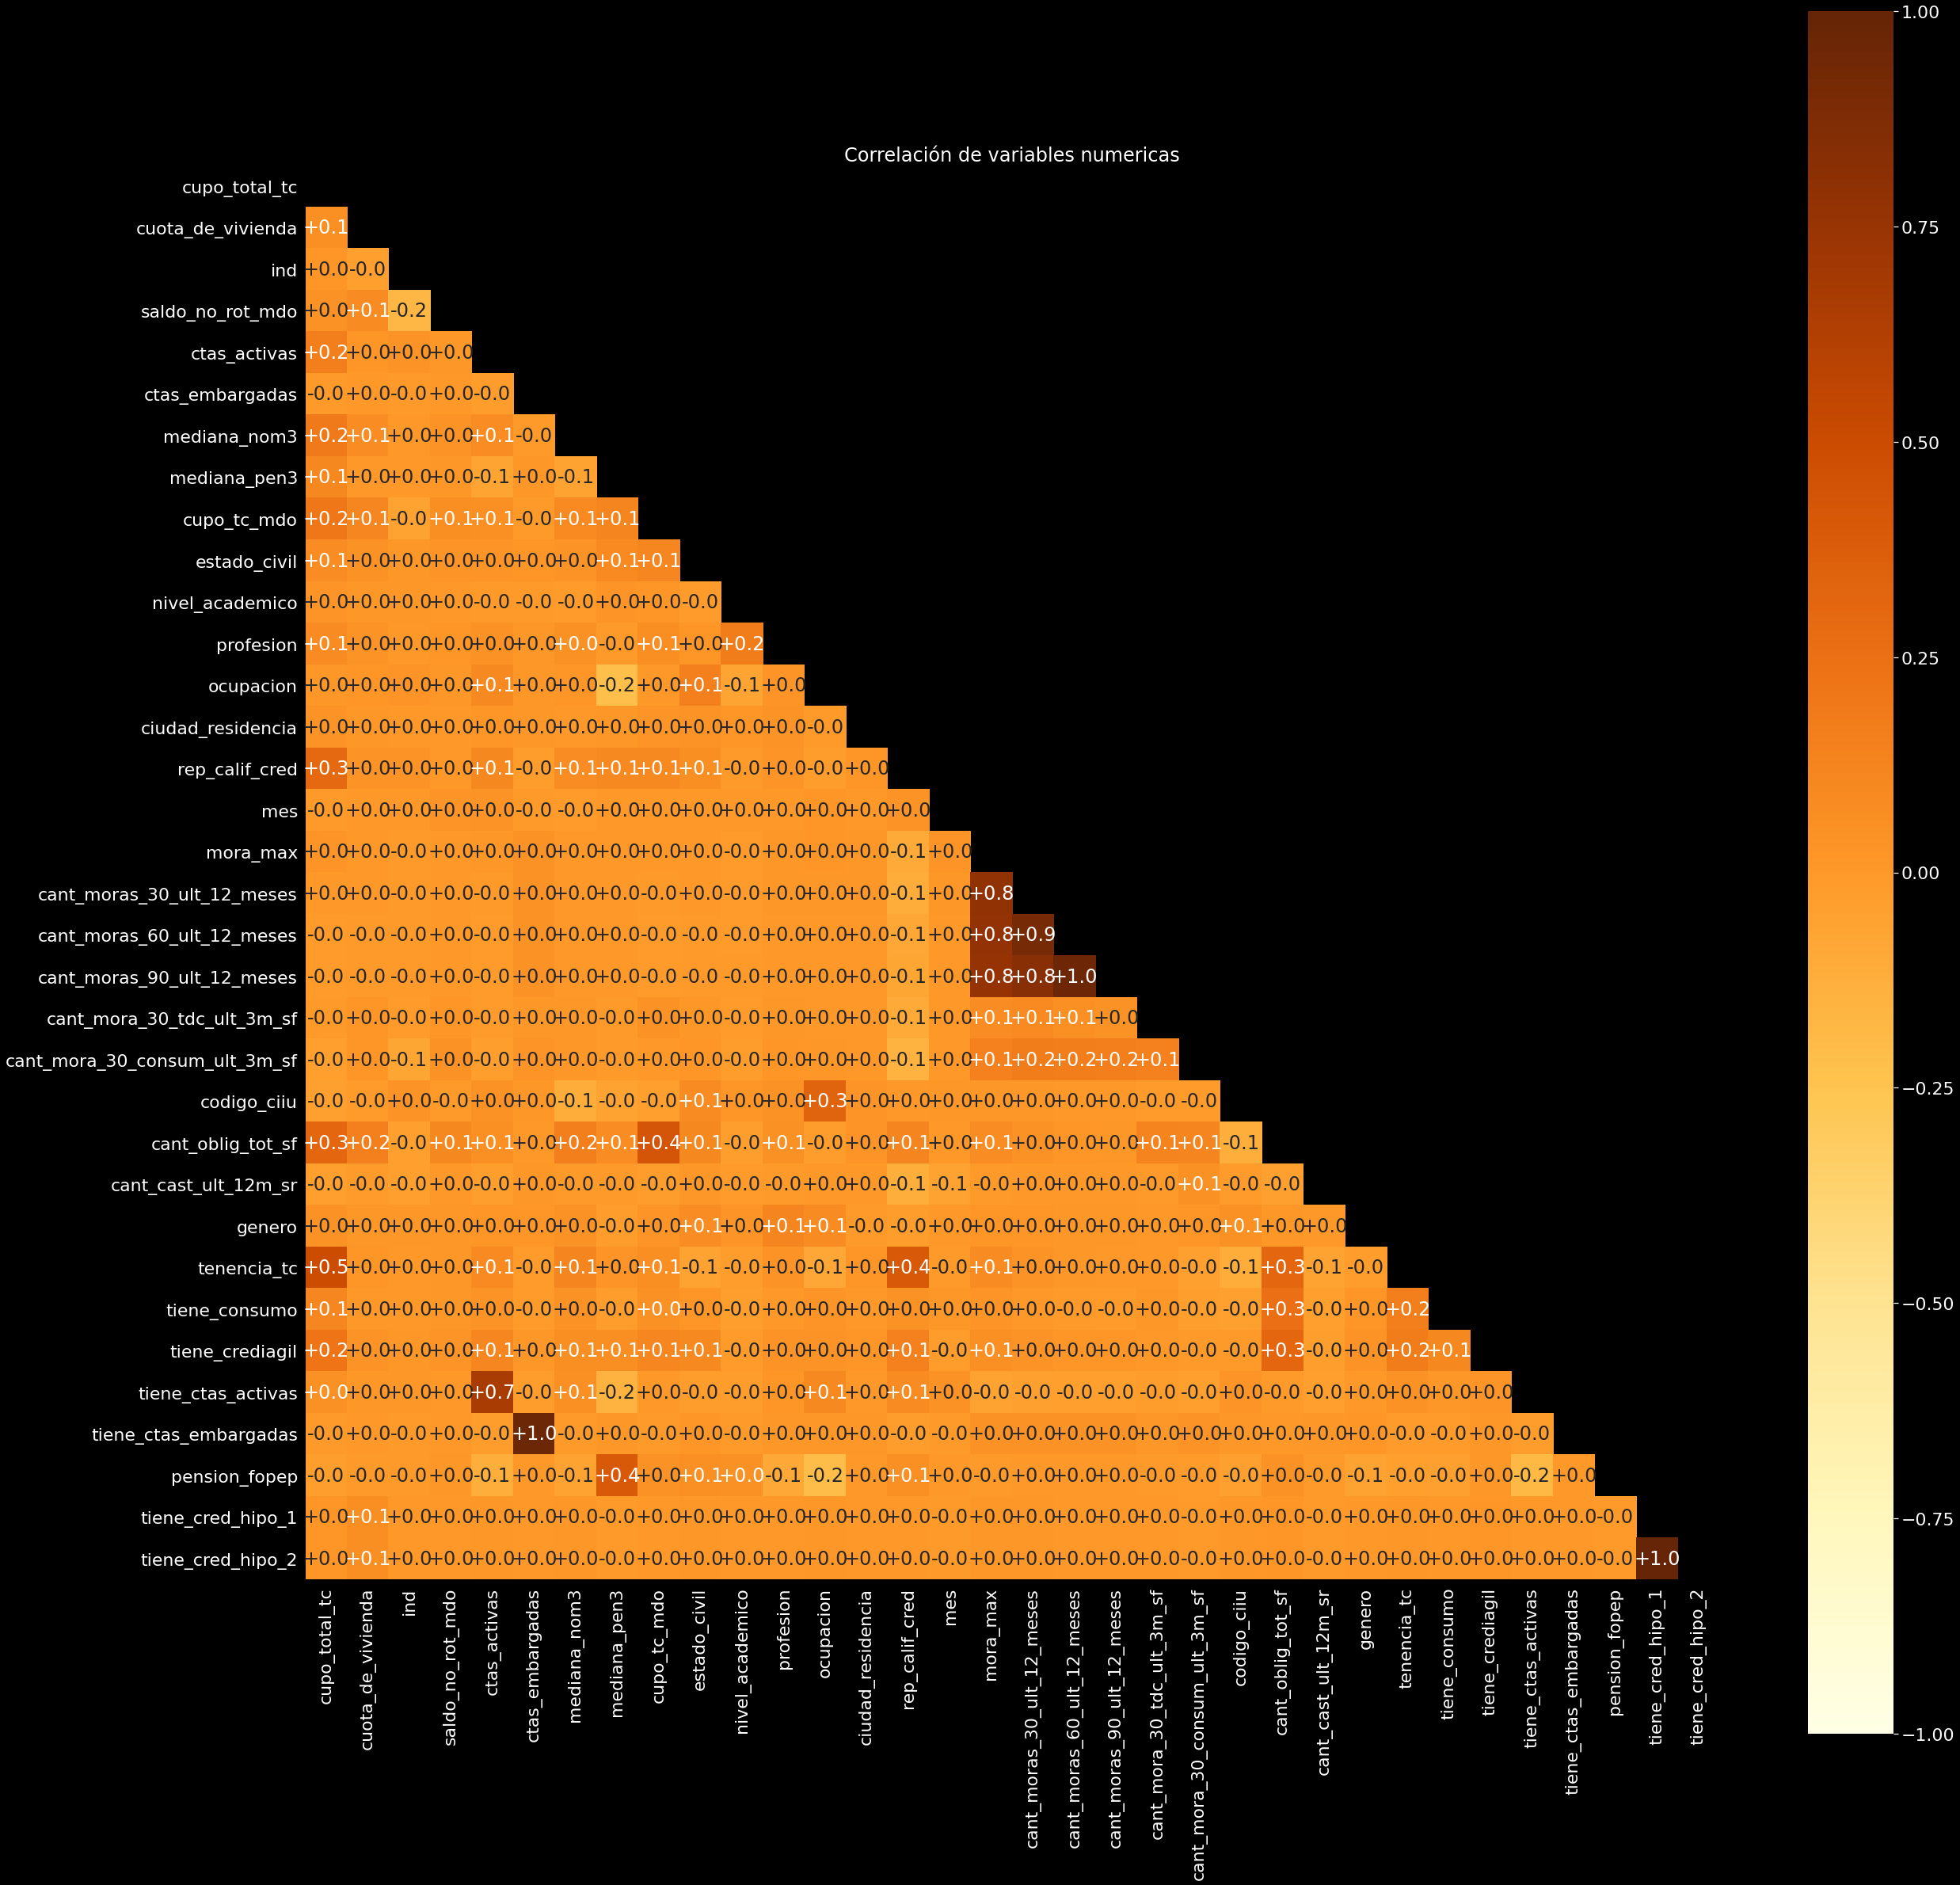

In [9]:
#plt.rcParams.update({'font.size': 13})
#compute correlation matrix
df_correlations = df[list(feature_num)].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=2)
plt.style.use("dark_background")
plt.figure(figsize= (40,40))
sns.heatmap(df_correlations, mask=mask, cmap="YlOrBr",#"RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1,
    fmt="+.1f")
plt.title("Correlación de variables numericas")

In [10]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs = strong_pairs[abs(sorted_pairs) < 1]
strong_pairs = pd.DataFrame(strong_pairs)
strong_pairs.columns = ['Correlation']
strong_pairs.drop_duplicates(subset=['Correlation'],inplace = True)
strong_pairs.reset_index(inplace=True)
strong_pairs

,level_0,level_1,Correlation
0,ctas_embargadas,tiene_ctas_embargadas,0.965477
1,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,0.958739
2,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,0.918608
3,cant_moras_30_ult_12_meses,cant_moras_90_ult_12_meses,0.833143
4,mora_max,cant_moras_30_ult_12_meses,0.786659
5,mora_max,cant_moras_60_ult_12_meses,0.777036
6,cant_moras_90_ult_12_meses,mora_max,0.759110
7,ctas_activas,tiene_ctas_activas,0.668171


# Vs Gasto familiar

In [11]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
high_cor = sorted_pairs[abs(sorted_pairs) < 2]
high_cor = pd.DataFrame(high_cor)
high_cor.columns = ['Correlation']
high_cor.drop_duplicates(subset=['Correlation'],inplace = True)
high_cor.reset_index(inplace=True)
high_cor = high_cor[high_cor['level_1'] == 'gasto_familiar']
high_cor.columns = ['level_0', 'level_key', 'Correlation']
level_uno = high_cor[['level_key','level_0', 'Correlation']]

In [12]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
high_cor = sorted_pairs[abs(sorted_pairs) < 2]
high_cor = pd.DataFrame(high_cor)
high_cor.columns = ['Correlation']
high_cor.drop_duplicates(subset=['Correlation'],inplace = True)
high_cor.reset_index(inplace=True)
high_cor = high_cor[high_cor['level_0'] == 'gasto_familiar']
level_cero = high_cor
#level_cero = pd.DataFrame(columns = ['level_0', 'level_1', 'Correlation'],data=high_cor)
level_cero.columns = ['level_key','level_0', 'Correlation']

In [13]:
corr_gasto_familiar = level_uno.append(level_cero)
corr_gasto_familiar['Correlation'] = [abs(x) for x in corr_gasto_familiar['Correlation']]
corr_gasto_familiar.sort_values(by='Correlation',inplace=True, ascending = False)
corr_gasto_familiar

,level_key,level_0,Correlation


## Tie Break (by best cor gasto_familiar)

In [14]:
to_delete = []

for i in strong_pairs.index:
    if corr_gasto_familiar[corr_gasto_familiar['level_0'] == strong_pairs.loc[i,'level_0']].index > corr_gasto_familiar[corr_gasto_familiar['level_0'] == strong_pairs.loc[i,'level_1']].index:
        to_delete.append(strong_pairs.loc[i,'level_0'])
    else:
        to_delete.append(strong_pairs.loc[i,'level_1'])
        
to_delete

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  after removing the cwd from sys.path.
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  after removing the cwd from sys.path.
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  after removing the cwd from sys.path.
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarn

['tiene_ctas_embargadas',
 'cant_moras_90_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'mora_max',
 'tiene_ctas_activas']

In [15]:
len(to_delete)

8

to_delete = ['mediana_pen3_desv',
             'cant_moras_60_ult_12_meses',
            'cant_moras_90_ult_12_meses',
            'cant_moras_30_ult_12_meses',
            'ingreso_nompen',
            'ingreso_final_desv',
            'mediana_nom3',
            'mediana_nom3_desv',
            'saldo_prom3_tdc_mdo',
            'cant_oblig_tot_sf',
            'estado_civil',
            'profesion',
             'ocupacion',
             'ciudad_residencia',
             'genero',
             'rep_calif_cred'
            ]

pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.rename(columns = {'genero_tag':'genero_num'},inplace=True)
indices = df.columns.str.extract(r"(_gasto_familiar)").dropna().index
df_var = df.iloc[:,indices]
indices2 = df.columns.str.extract(r"(tag)").isna()[0].to_list()
df_indices2 = df.loc[:,indices2]
df_final = pd.concat([df_indices2,df_var],axis=1)
df_final.head(30)

## 1. LM with  all variables no correlated

In [16]:
X = df.columns[~df.columns.isin(to_delete)]
y = 'gasto_familiar'

In [17]:
df[X].shape

(10397407, 35)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.30)

KeyError: 'gasto_familiar'

In [ ]:
formula = '{} ~ {}'.format(y,' + '.join(col for col in df[X].columns if col != 'gasto_familiar'))
formula

In [ ]:
ml = smf.ols(formula, data = X_train).fit()
print(ml.summary())

In [ ]:
df[X].shape[1]

In [ ]:
best_pvalues = ml.pvalues[ml.pvalues < 0.05/(df[X].shape[1]-1)].sort_values()
best_pvalues = pd.DataFrame(best_pvalues)
best_pvalues.reset_index(inplace=True)
best_pvalues[['Variable','Categoria']] = best_pvalues['index'].str.split("[",expand=True)
to_continue = best_pvalues[best_pvalues['Variable']!= 'Intercept']['Variable'].unique()
list(to_continue)

## 2. LM with Best p-Value variables

In [ ]:
X = ['ind',
    'mediana_nom3',
    'tiene_cred_hipo_1',
    'cupo_total_tc',
    'tiene_cred_hipo_2',
    'rep_calif_cred',
    'ingreso_final',
    'cuota_de_consumo',
    'ctas_activas',
    'cuota_sector_real_comercio',
    'nivel_academico',
    'genero',
    'cuota_de_vivienda',
    'profesion',
    'cupo_tc_mdo',
    'tiene_consumo',
    'cuota_de_sector_solidario',
    'saldo_no_rot_mdo',
    'tenencia_tc',
    'tiene_crediagil',
    'ciudad_residencia_tag_gasto_familiar',
    'ocupacion',
    'ciudad_residencia',
    'estado_civil',
    'ocupacion_tag_gasto_familiar',
    'cuota_rotativos',
    'mora_max',
    'rep_calif_cred_tag_gasto_familiar',
    'cant_mora_30_tdc_ult_3m_sf',
    'profesion_tag_gasto_familiar',
    'pension_fopep',
    'ocupacion_tag_ind',
    'nivel_academico_tag_gasto_familiar',
    'profesion_tag_ingreso_nompen',
    'gasto_familiar']

In [ ]:
#X = pd.DataFrame(to_continue)[0]
y = 'gasto_familiar'

In [ ]:
df[X].shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.30)

In [ ]:
formula = '{} ~ {}'.format(y,' + '.join(col for col in df[X].columns if col != 'gasto_familiar'))
formula

In [ ]:
ml_best_pvalues = smf.ols(formula, data = X_train).fit()
print(ml.summary())

In [ ]:
df[X].shape[1]

In [ ]:
best_pvalues2 = ml.pvalues[ml.pvalues < 0.05/(df[X].shape[1]-1)].sort_values()
best_pvalues2 = pd.DataFrame(best_pvalues2)
best_pvalues2.reset_index(inplace=True)
best_pvalues2[['Variable','Categoria']] = best_pvalues2['index'].str.split("[",expand=True)
to_continue2 = best_pvalues2[best_pvalues2['Variable']!= 'Intercept']['Variable'].unique()
list(to_continue2)

In [ ]:
X = pd.DataFrame(data = X, columns=['Selected_variables'])
X

In [ ]:
X.to_csv("/mnt/workstation/data/Xid_Variables.csv", index=False)